In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("HW1.ipynb")

### Grading
The final score that you will receive for your programming assignment is generated in relation to the total points set in your programming assignment item—not the total point value in the autograder output.     
Autograded quesions may have hidden tests and/or public tests. You can see the public test results when you run the notebook with otter grader. Usually public tests are for simple checks (such as variable types) and may not indicate that the answer is correct.     
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** The autograder will not work properly if your change the variable or method signatures. 

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

#  I. EDA, Simple Linear Regression

In this part, we will use a simplified data and create a simple linear regression model. The dataset can be downloaded from https://www.kaggle.com/harlfoxem/housesalesprediction/download.    
This dataset contains house sale prices for Kings County, which includes Seattle. It includes homes sold between May 2014 and May 2015. There are several versions of the data. Some additional information about the columns is available here: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/, some of which are copied below.

|Variable |	Description|
|:---------|:-------------|
|id 	|Identification|
|date |	Date sold|
|price |	Sale price|
|bedrooms |	Number of bedrooms|
|bathrooms |	Number of bathrooms|
|sqft_liv |	Size of living area in square feet|
|sqft_lot| 	Size of the lot in square feet|
|floors |	Number of floors|
|waterfront |	‘1’ if the property has a waterfront, ‘0’ if not.|
|view |	An index from 0 to 4 of how good the view of the property was|
|condition |	Condition of the house, ranked from 1 to 5|
|grade |	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.|
|sqft_above |	Square feet above ground|
|sqft_basmt |	Square feet below ground|
|yr_built 	|Year built|
|yr_renov |	Year renovated. ‘0’ if never renovated|
|zipcode |	5 digit zip code|
|lat 	|Latitude|
|long 	|Longitude|
|squft_liv15 |	Average size of interior housing living space for the closest 15 houses, in square feet|
|squft_lot15 |	Average size of land lost for the closest 15 houses, in square feet|

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import scipy as sp
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv('data/house_data_washington.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1. Munging data [20 pts]
### 1a) Date string to numbers [5 pts]
Inspect the data frame and data type of each column. The column 'date' is the date sold, and has string value. We will extract year and month information from the string. 
In the data frame df, create new features 'sales_year' and 'sales_month', which values are integer.

Hint: Consider using .apply(lambda ...) method.

In [6]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df
...
df['sales_year'] = df['date'].str[:4].astype(int);
df['sales_month'] = df['date'].str[4:6].astype(int);
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

0    10
1    12
2     2
3    12
4     2
Name: sales_month, dtype: int64

### 1b) Now, let's count how many sales happened each year and each month.
#### 1b-i) Use .groupby and .count methods to calculate how many sales per year, and how many sales per month. 
Display the results by printing the groupby object with one relevant column. 
For example, a result for sales_month may look like    

|     |sales_month|
|:---|:----------|
|1 |     978|     
|2 |    1250  |  
|3 |    1875   |  
...

In [7]:
df.groupby(['sales_month']).count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year
sales_month,,,,,,,,,,,,,,,,,,,,,
1,978,978,978,978,978,978,978,978,978,978,...,978,978,978,978,978,978,978,978,978,978
2,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,...,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250
3,1875,1875,1875,1875,1875,1875,1875,1875,1875,1875,...,1875,1875,1875,1875,1875,1875,1875,1875,1875,1875
4,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231,...,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231
5,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414,...,2414,2414,2414,2414,2414,2414,2414,2414,2414,2414
6,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,...,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180
7,2211,2211,2211,2211,2211,2211,2211,2211,2211,2211,...,2211,2211,2211,2211,2211,2211,2211,2211,2211,2211
8,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940,...,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940
9,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,...,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774


#### 1b-ii) Which month has the most number of sales? Answer the month as an integer number.

In [8]:
...
# uncomment and update the value.
most_sales = 5

#### 1b-iii) Which months has the least number of sales?

In [9]:
...
# uncomment and update the value.
least_sales = 1

### 1c) Variable types [5 pts]
Inspect each feature's data type and variable type. What is the best description for the variable type of following features? Update the string to 'numeric' or 'categorical'.

In [10]:
# df['bathrooms']
# uncomment the feaures below and update the strings with 'numeric' or 'categorical'
price = 'numeric'
bathrooms = 'numeric'
waterfront = 'categorical'
grade = 'categorical'
zipcode = 'categorical'

### 1d) Drop features [5 pts]
Let's drop features that are unnecessary. `id` is not a meaningful feature. `date` string has been coded to `sales_month` and `sales_year`, so we can remove `date`. `zipcode` can be also removed as it's hard to include in a linear regressio model and the location info is included in the `lat` and `long`.
Drop the features `id`, `date`, and `zipcode` and replace the df.

Hint: Use .drop() method.

In [11]:
# drop unnecessary features, replace df
df.drop(columns=['id', 'date', 'zipcode'], inplace=True)

df.info() #a quick check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sales_

In [12]:
grader.check("q1d")

q1d results: All test cases passed!

## 2. More EDA; Correlation and pair plot [15 pts]
### 2a) Get correlation matrix on the data frame. [5 pts]
Which feature may be the best predictor of price based on the correlation? Answer as a string value (e.g. best_guess_predictor = 'yr_built')

In [13]:
corr = df.corr()
print(corr)
# uncomment and update best_guess_predictor with a string value
best_guess_predictor = 'sqft_living'

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

<!-- BEGIN QUESTION -->

### 2b) Display the correlation matrix as heat map [5 pts]
[`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) can visualize a matrix as a heatmap. Visualize the correlation matrix using seaborn.heatmap(). Play with color map, text font size, decimals, text orientation etc. If you find how to make a pretty visualization, please share in the discussion board. 

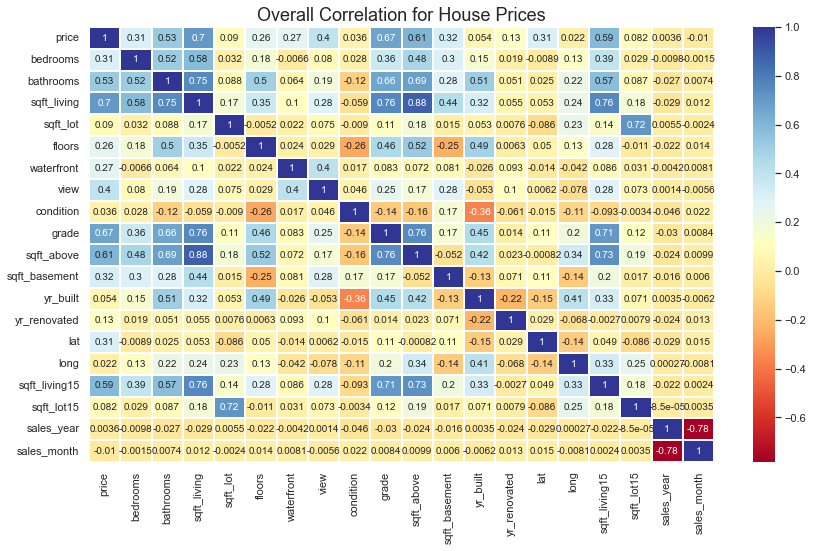

In [14]:
plt.figure(figsize=(14,8))
plt.title('Overall Correlation for House Prices', fontsize=18)
sns.heatmap(corr,annot=True,cmap="RdYlBu", linewidths=.02)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 2c) Pair plot [5 pts]
Pair plot is a fast way to inspect relationships between features. Use seaborn's .pairplot() function to draw a pairplot if the first 10 columns (including price) and inspect their relationships. Set the diagonal elements to be KDE plot.

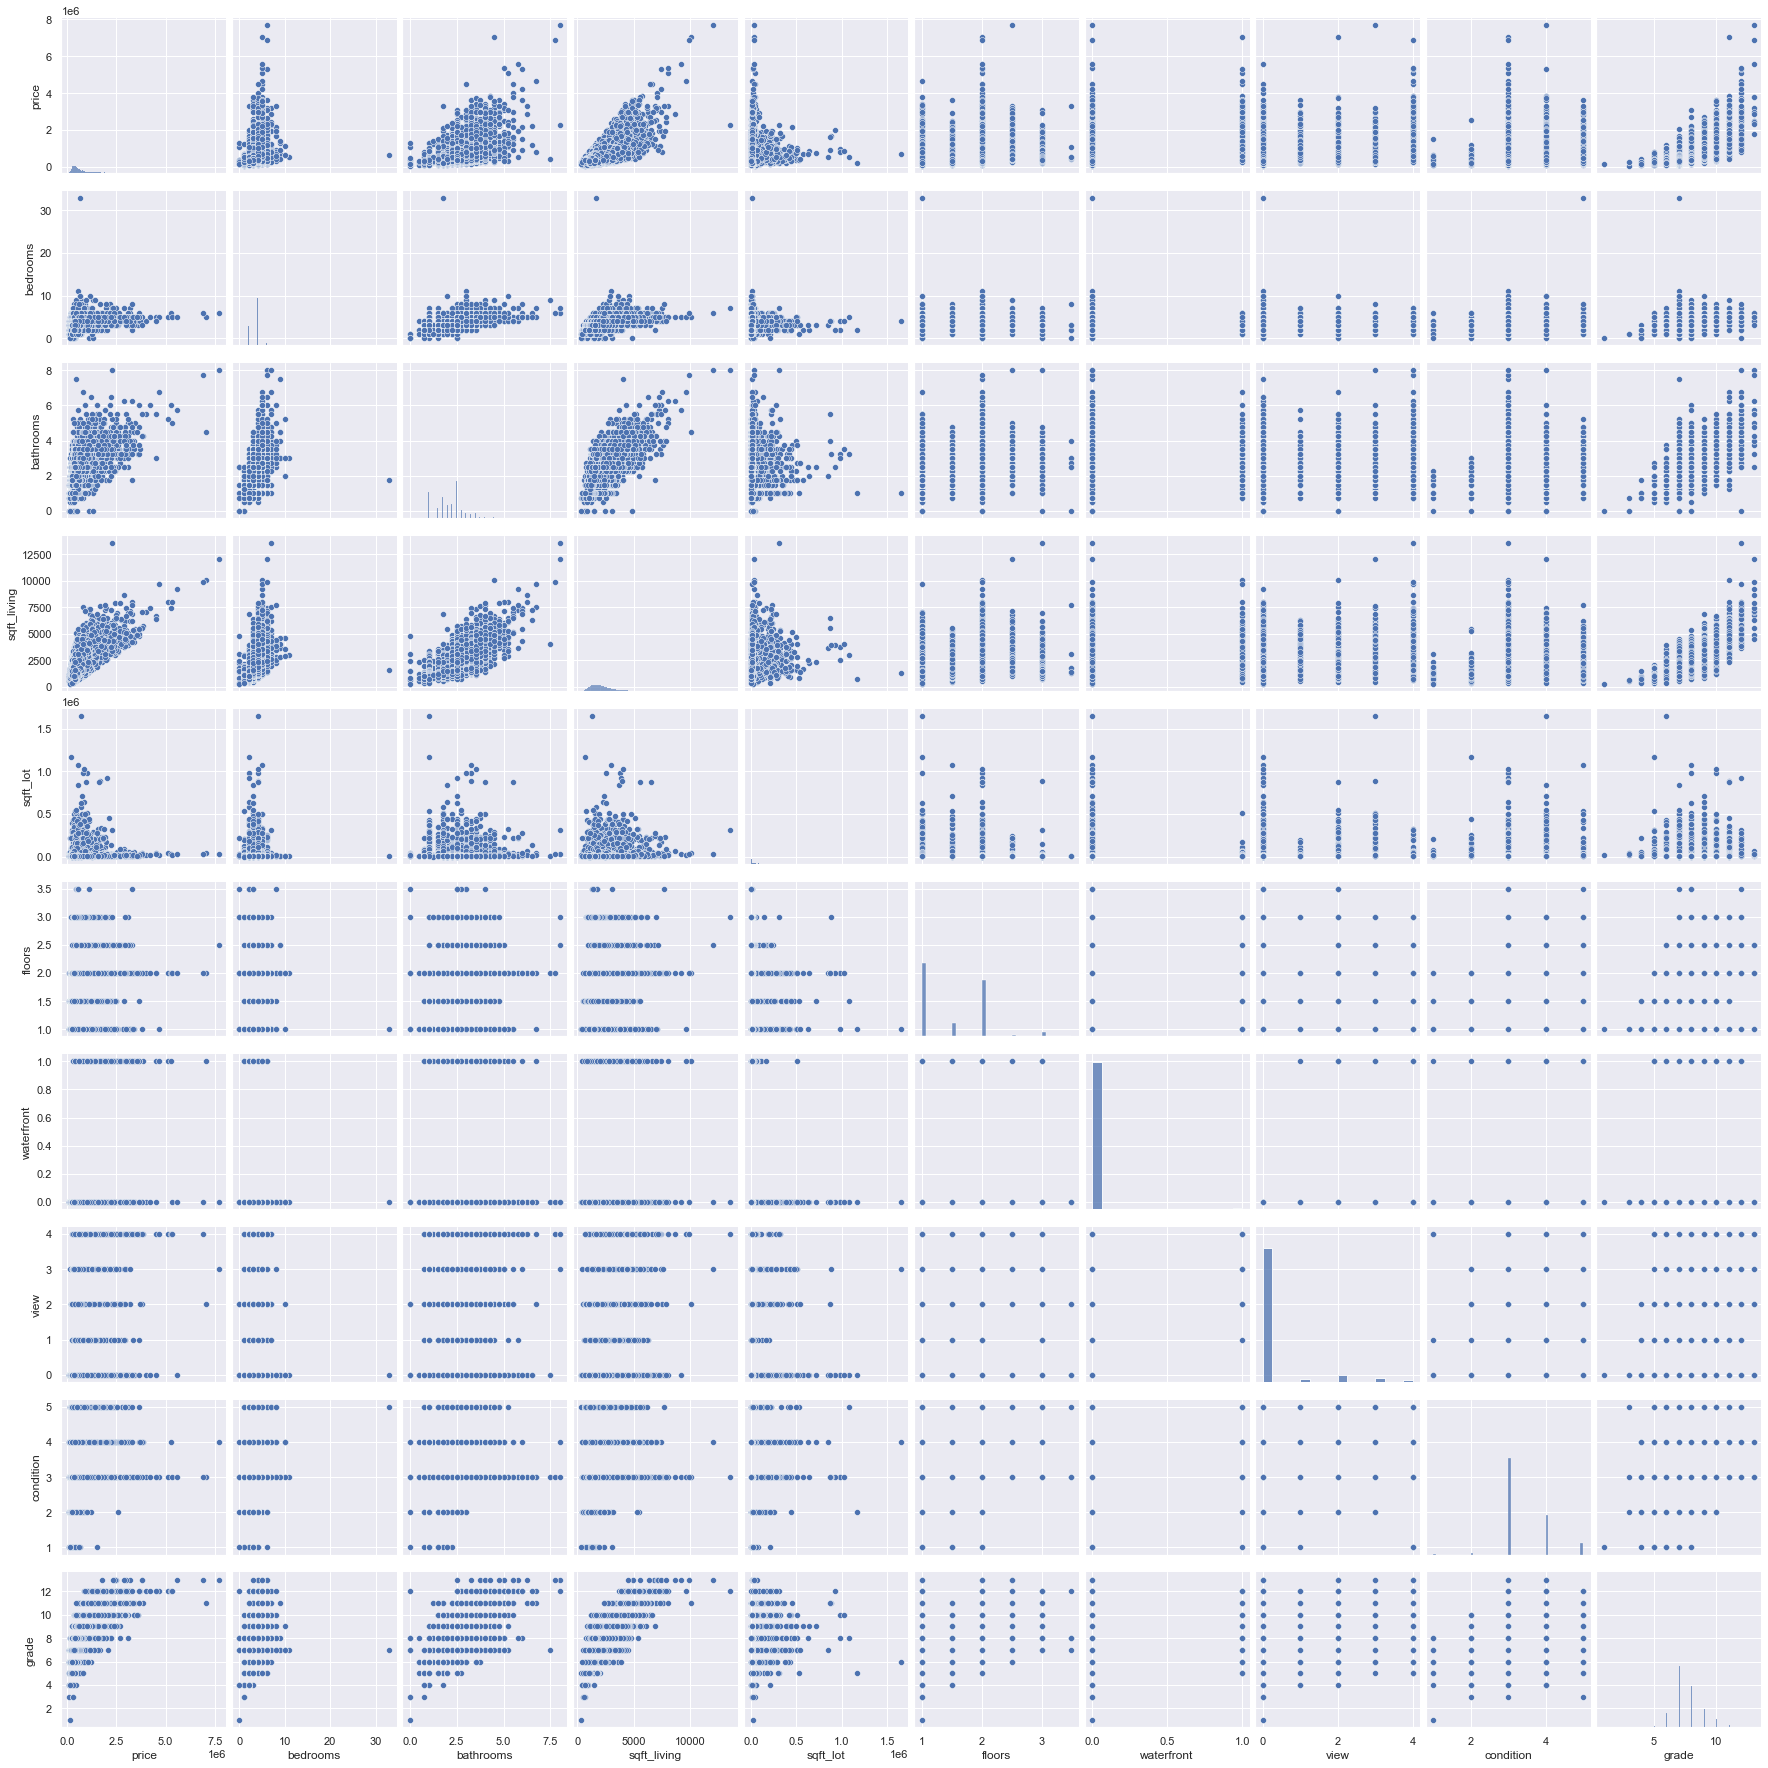

In [15]:
# practice inspecting relationships between features using a pair plot. 
tenColumns=df.iloc[:,:10];
sns.pairplot(tenColumns);

<!-- END QUESTION -->

## 3. Simple linear regression [15 pts]

### 3a) Data preparation [5 pts]
We will split the data to train and test datasets such that the test dataset is 20% of original data.
Use `sklearn.model_selection.train_test_split` function to split the data frame to X_train and X_test. X_train is 80% of observation randomly chosen. X_test is the rest 20%. Both X_train and X_test are `pd.DataFrame` object and include 'price' in the table. Note that the train_test_split can handle data frame as well as array.

In [16]:

X_train, X_test = train_test_split(df, train_size=.8,  test_size=.2)
denom = len(df)
print("X_train size: ", len(X_train))
print("X_test size: ", len(X_test))
# use sklearn.model_selecttion.train_test_split to split the data frame 
# X_train is 80% of the observations; X_test is 20% of the observations
# print length of X_train and X_test

X_train size:  17290
X_test size:  4323


In [17]:
X_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
15672,355000,4,2.5,2150,3600,2.0,0,0,3,7,2150,0,2010,0,47.3658,-122.019,2220,3915,2015,4
3285,315000,1,1.0,580,7200,1.0,0,0,3,6,580,0,2000,0,47.5249,-122.373,1360,7560,2014,10
1806,574000,3,2.0,2060,7000,1.0,0,0,4,9,2060,0,1988,0,47.5644,-122.012,2110,7000,2014,11
11249,246900,3,1.5,1370,9800,1.0,0,0,5,7,1370,0,1968,0,47.3068,-122.270,1370,9800,2015,2
11705,310000,4,1.0,1030,5750,1.0,0,0,3,7,1030,0,1971,0,47.5530,-122.370,1250,5750,2014,9


In [18]:
grader.check("q3a")

q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3b) Train a simple linear regression model [5pts]
Use the best_guess_predictor as a single predictor and build a simple linear regression model using `statsmodels.formula.api.ols` function (https://www.statsmodels.org/dev/example_formulas.html)
Print out the result summary. Train on the X_train portion. What is the adjusted R-squared value?

In [19]:
# use best_guess_predictor as a single predictor
# build a simple linear regression model, train on the X_train portion

mod = smf.ols(formula='price ~ sqft_living', data=X_train);
res = mod.fit();
print(res.summary());
print("R2: ", res.rsquared_adj);

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:01   Log-Likelihood:            -2.4039e+05
No. Observations:               17290   AIC:                         4.808e+05
Df Residuals:                   17288   BIC:                         4.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.571e+04   4966.712     -9.204      

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3c) Best predictor [5 pts]
In question 2a, we picked a best guess predictor for price based on the correlation matrix. Now we will consider whether the best_guess_predictor that we used is still the best.<br>
Print out a list ranking all of the predictors. Then print out a list of the top three predictors in order.<br>      
Hint: Linear regression uses adjusted R squared as fit performance. <br>

**Answer the following questions**: 
1. What were your top three predictors? 

a: ['sqft_living', 'grade', 'sqft_above']

2. How did you order your list of predictors to select those as the top ones?

a: I looped through all the predictors against the price and sorted the results in reverse

3. Is your top predictor for this section the same as the best guess predictor you selected in question 2a? 

a: Yes

In [20]:
col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month']
R2 = {}
for features in col:
    predictors = f'price ~ {features}'
    mod = smf.ols(formula=predictors, data=X_train);
    res = mod.fit();
    R2[features] = res.rsquared_adj;
result = {key: val for key, val in sorted(R2.items(), key = lambda x:x[1], reverse=True)}
print("R2 values: ", str(result))

# uncomment and update top_three
top_three = ['sqft_living', 'grade', 'sqft_above']

R2 values:  {'sqft_living': 0.48997640812571375, 'grade': 0.44463213993195017, 'sqft_above': 0.3661798451635847, 'sqft_living15': 0.3448380574466091, 'bathrooms': 0.27783185497788065, 'view': 0.15735394433076821, 'sqft_basement': 0.10236819942073228, 'bedrooms': 0.09760079647500686, 'lat': 0.09380943159784383, 'waterfront': 0.06857398344779364, 'floors': 0.06577760448867176, 'yr_renovated': 0.014517060545244598, 'sqft_lot': 0.007677349242920628, 'sqft_lot15': 0.0067118579233336195, 'yr_built': 0.003078128652555967, 'condition': 0.0012540340612873235, 'long': 0.0004177327200883818, 'sales_month': 0.00012030444418276165, 'sales_year': 1.3301556016753757e-05}


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# II. Polynomial and Multilinear Regression
In this part, we will improve our model using multiple features and higher powers of features.

## 4. Polynomial Regression [20 pts]
Using the best predictor found from 3c, let's add higher orders of the feature.    
We will iteratively add higher order terms and plot train and test errors (MSE).    
### 4a) Iteratively add higher order terms up to 5th power of the best predictor [5 pts]
For example, compare models
- $model1 = a_0 + a_1 X$
- $model2 = a_0 + a_1 X + a_2 X^2$
- $model3 = a_0 + a_1 X + a_2 X^2 + a_3 X^3$   
...    
Hint: Use for loop and use 'np.power()' in the formula of smf.ols method. e.g. formula = 'y~X+np.power(X,2)'.     
Hint: Before you build models, should we rescale the X first? Why or why not? How would you rescale? How about rescaling y? Choose rescaling method that's more interpretable. For example, you can think about changing the unit of $X$ to sqft to 1000 sqft.

### 4b) Visualize the model fit results [5 pts]
Now we will add tools helpful for judging whether each model looks good.    
Modify your for loop code from above and display a graph that shows train data ($X_\textrm{tr}$, $y_\textrm{tr}$) and train prediction result ($X_\textrm{tr}$, model($X_\textrm{tr}$)), and the model summary.
As an example, the univariate linear model's train result looks like below (blue dots are the train data, and red dotted line is the prediction from the train data, the complexity $k=1$ is the heighest power of $X$ in the model).  
![An examlpe plot for univariate linear model](linreg_result.png)

### 4c) Compare train error and test error [5 pts]
We will inspect train error and test error for each model complexity. To do that, let's save the train and test errors after we build each model. Modify your for loop above to save train error and test error from each model. Plot the final result showing train and test errors. You graph will have the complexity $k$ as x-axis and the train and test errors on the y-axis. Also, make legends for train and test errors.  

Hint: You may use functions in sklearn.metrics to calculate errors.     
Hint: train error refers the error between y_train and model prediction from X_train whereas test error refers the error between y_test and model prediction from X_test.    
Hint: RMSE can be useful to inerpret the error of y than MSE. Or mean absolute percentage error can be useful metric.

In [21]:
# std_scaler = StandardScaler()

# cols = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
#        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
#        'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month']

# index = 0
# #fit the values to the function 
# Stand_Sc = std_scaler.fit_transform(X_train[cols].iloc[:,range(0,len(col))].values)

# #use seaborn for KDE plot
# sns.kdeplot(Stand_Sc[:,index],fill=True, color = 'Green')
 
# #Label the plot 
# plt.xlabel(f'standardized values - {cols[index]}')
 
# #Print the plot 
# plt.show()

In [22]:
#resizing the x_train data. using MinMax Scaler

# Xnew = (x - xmin ) / (xmax - xmin)

# With this estimation scale, each feature can be translated separately within the range provided on the training set. The min-max scaler allows you to shrink the data within the range of -1 to 1 when there can be negative values.

# The range for training the set can be (0,1), (0,5), or (-1,1). The scaling responds at its best when the standard deviation is small and when a distribution is not Gaussian. These scalers are also sensitive to outliers.

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
x = X_train.copy()
x = pd.DataFrame(minmax_scale.fit_transform(x), columns=x.columns)
x_test = X_test.copy()
x_test = pd.DataFrame(minmax_scale.fit_transform(x_test), columns=x_test.columns)
# print("x.head()\n", x.head())
print("nx_test.head()\n",x_test.head())




nx_test.head()
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  0.034407  0.090909   0.233333     0.140811  0.009518     0.0         0.0   
1  0.060763  0.090909   0.233333     0.194511  0.008260     0.0         0.0   
2  0.079931  0.090909   0.266667     0.210024  0.010558     0.0         0.0   
3  0.192064  0.090909   0.333333     0.304296  0.006694     0.5         0.0   
4  0.057504  0.121212   0.333333     0.280430  0.007237     0.5         0.0   

   view  condition     grade  sqft_above  sqft_basement  yr_built  \
0  0.00        0.5  0.500000    0.167852            0.0  0.773913   
1  0.00        0.5  0.500000    0.231863            0.0  0.591304   
2  0.00        0.5  0.583333    0.250356            0.0  0.756522   
3  0.75        0.5  0.833333    0.362731            0.0  0.843478   
4  0.00        0.5  0.666667    0.334282            0.0  0.904348   

   yr_renovated       lat      long  sqft_living15  sqft_lot15  sales_year  \
0           0.0 


price ~ sqft_living 

Result Summary 1                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:02   Log-Likelihood:                 33605.
No. Observations:               17290   AIC:                        -6.721e+04
Df Residuals:                   17288   BIC:                        -6.719e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

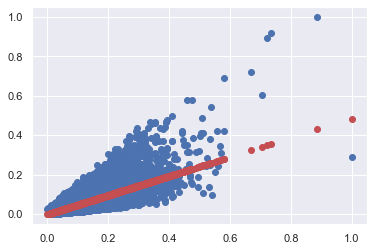


price ~ sqft_living  + np.power(sqft_living,2)

Result Summary 2                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     9684.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:02   Log-Likelihood:                 34282.
No. Observations:               17290   AIC:                        -6.856e+04
Df Residuals:                   17287   BIC:                        -6.853e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

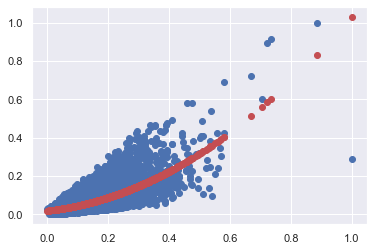


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3)

Result Summary 3                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     6638.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:02   Log-Likelihood:                 34410.
No. Observations:               17290   AIC:                        -6.881e+04
Df Residuals:                   17286   BIC:                        -6.878e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

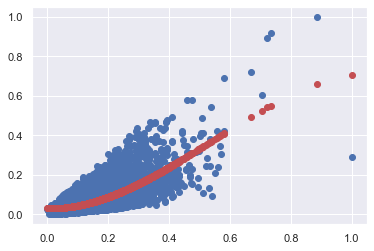


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3) + np.power(sqft_living,4)

Result Summary 4                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     5032.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:02   Log-Likelihood:                 34460.
No. Observations:               17290   AIC:                        -6.891e+04
Df Residuals:                   17285   BIC:                        -6.887e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]

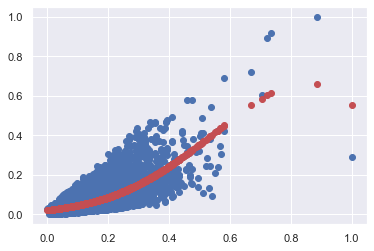


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3) + np.power(sqft_living,4) + np.power(sqft_living,5)

Result Summary 5                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     4111.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:02   Log-Likelihood:                 34558.
No. Observations:               17290   AIC:                        -6.910e+04
Df Residuals:                   17284   BIC:                        -6.906e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|

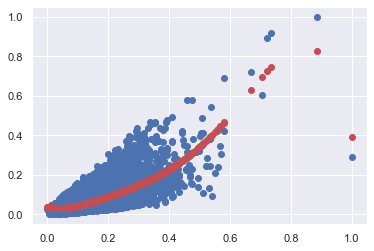


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3) + np.power(sqft_living,4) + np.power(sqft_living,5) + np.power(sqft_living,6)

Result Summary 6                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     3532.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:03   Log-Likelihood:                 34703.
No. Observations:               17290   AIC:                        -6.939e+04
Df Residuals:                   17283   BIC:                        -6.934e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    s

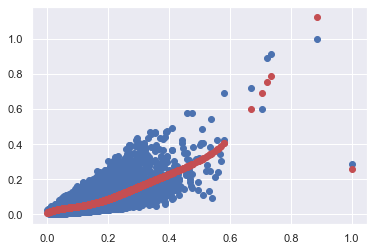


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3) + np.power(sqft_living,4) + np.power(sqft_living,5) + np.power(sqft_living,6) + np.power(sqft_living,7)

Result Summary 7                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     3031.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:03   Log-Likelihood:                 34708.
No. Observations:               17290   AIC:                        -6.940e+04
Df Residuals:                   17282   BIC:                        -6.934e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
              

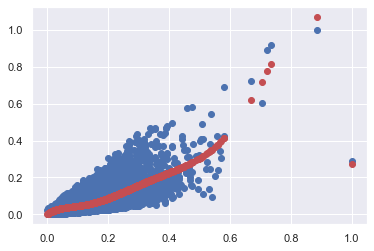


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3) + np.power(sqft_living,4) + np.power(sqft_living,5) + np.power(sqft_living,6) + np.power(sqft_living,7) + np.power(sqft_living,8)

Result Summary 8                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     2668.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:03   Log-Likelihood:                 34737.
No. Observations:               17290   AIC:                        -6.946e+04
Df Residuals:                   17281   BIC:                        -6.939e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                              

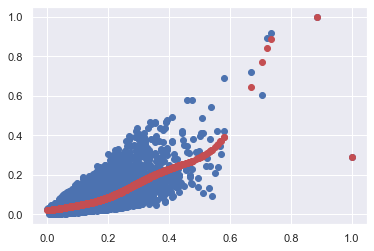


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3) + np.power(sqft_living,4) + np.power(sqft_living,5) + np.power(sqft_living,6) + np.power(sqft_living,7) + np.power(sqft_living,8) + np.power(sqft_living,9)

Result Summary 9                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     2371.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:03   Log-Likelihood:                 34737.
No. Observations:               17290   AIC:                        -6.945e+04
Df Residuals:                   17280   BIC:                        -6.938e+04
Df Model:                           9                                         
Covariance Type:            nonrobust    

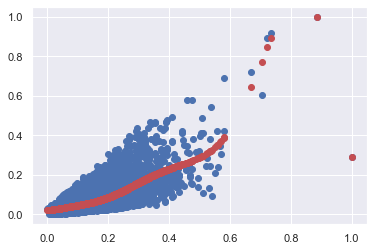


price ~ sqft_living  + np.power(sqft_living,2) + np.power(sqft_living,3) + np.power(sqft_living,4) + np.power(sqft_living,5) + np.power(sqft_living,6) + np.power(sqft_living,7) + np.power(sqft_living,8) + np.power(sqft_living,9) + np.power(sqft_living,10)

Result Summary 10                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     2136.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:20:04   Log-Likelihood:                 34741.
No. Observations:               17290   AIC:                        -6.946e+04
Df Residuals:                   17279   BIC:                        -6.937e+04
Df Model:                          10                                         
Covariance Ty

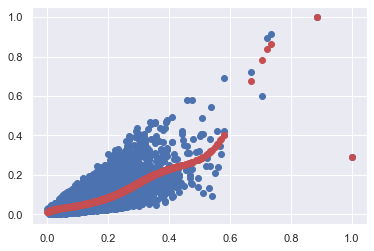

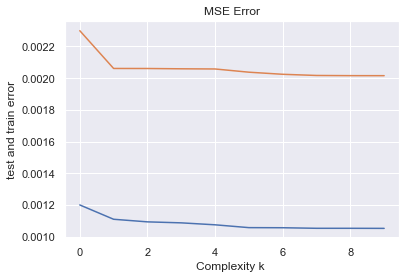

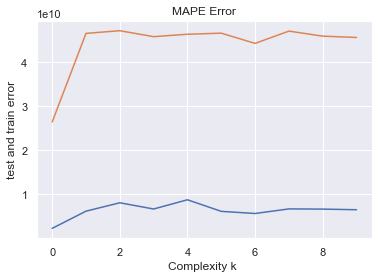

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
# # 4A running polynomial regression with new resized values
prop = ''
count = 0
train_errors = []
test_errors = []
m_train_errors = []
m_test_errors = []

for number in range(2,12):
    model = smf.ols(formula=f'price ~ sqft_living{prop}', data=x).fit();
    model_t = smf.ols(formula=f'price ~ sqft_living{prop}', data=x_test).fit();
    y_train_predict = model.predict(x['sqft_living'])
    y_test_predict = model_t.predict(x_test['sqft_living'])
    count +=1
    print(f'\nprice ~ sqft_living {prop}')
    print(f'\nResult Summary {count}', model.summary());
#   mean squared error compare
    m_tr_error = mean_squared_error(x['price'],y_train_predict)
    m_te_error = mean_squared_error(x_test['price'], y_test_predict)
    m_train_errors.append(m_tr_error)
    m_test_errors.append(m_te_error)
#   MAPE error compare
    tr_error = mean_absolute_percentage_error(x['price'],y_train_predict)
    te_error = mean_absolute_percentage_error(x_test['price'], y_test_predict)
    train_errors.append(tr_error)
    test_errors.append(te_error)
    plt.scatter(x['sqft_living'],x['price'])
    plt.plot(x['sqft_living'], y_train_predict, 'ro')
    plt.show()
    prop2 = f' + np.power(sqft_living,{number})'
    prop = prop + prop2


plt.title("MSE Error")    
plt.plot(m_train_errors)
plt.plot(m_test_errors)
plt.ylabel('test and train error')
plt.xlabel('Complexity k ')
plt.show();    
    
plt.title("MAPE Error")    
plt.plot(train_errors)
plt.plot(test_errors)
plt.ylabel('test and train error')
plt.xlabel('Complexity k ')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 4d) Inspect the results from 4b) and 4c), describe your observation. Based on the observation, pick a final model. Justify your decision. [5 pts]
Hint: Refer to Elobow plot and Occam's razor principle.    
Hint: If the trent at k=10 is not enough, try changing the power limit (previously set to $k_\textrm{max}=10$) to smaller and bigger numbers and see the general trend.    
Hint: You can also consider AIC and BIC.

From these graphs the final complexity should be at K=5. The graph shows that the overall accruacy of the training doesnt get significantly after that point

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5. Multilinear Regression [20 pts]
Let's include more features (linear) to our model instead of having single factor and its higher order terms. For the complexity sake, we will not consider higher orders of features.

### 5a) Implement hybrid approach of forward and backward selection methods. [15 pts]
Without using rescaling for y (price) and all features, implement the hybrid approach.
What is the number of features in the final model (not inclusing intercept as feature)?

Hint: Following logic might help.
```
while
    for feature in [features that are not in the model already]
        best_feature <- select a feature that gives the heighest adjusted R2
        best_model <- add the best_feature in the model

       for attribute in the all attributes of the best_model
           inspect p-value of each attribute
           remove any attribute(s) with high p-values from the best_model
    break and return the best_model if the best_model (the set of its attributes) no longer changes.  
```      

In [24]:
# forward selection
# while True:
#     for feature in features:
#         model = smf.ols(formula = prop + feature, data = X_train).fit();
#         rss = model.rsquared_adj;
#         if (rss > prev_rss):
#             prev_rss = rss
#             prev_feature = feature
#     if(prev_feature not in current_model):
#         current_model.append(prev_feature)

#     else:
#         break

In [25]:
import copy
current_model = []
prev_rss = 0
count = 0
high_p =0
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month']

previous_model = []

train_errors = []
test_errors = []
m_train_errors = []
m_test_errors = []


prop = 'price ~'

while True:
    count +=1
    for feature in features:
        model = smf.ols(formula = prop + feature, data = X_train).fit();
        rss = model.rsquared_adj
        if (rss > prev_rss):
            prev_rss = rss
            prev_feature = feature
    if(prev_feature not in current_model):
        previous_model = copy.deepcopy(current_model)
        current_model.append(prev_feature)
        prop = 'price ~ '+ '+'.join(current_model) + '+'
        features.remove(prev_feature)
        model = smf.ols(formula = 'price ~ '+ '+'.join(current_model) , data = X_train).fit();
        model_t = smf.ols(formula ='price ~ '+ '+'.join(current_model), data = X_test).fit();
        y_train_predict = model.predict(X_train)
        y_test_predict = model_t.predict(X_test)
        m_tr_error = mean_squared_error(X_train['price'],y_train_predict)
        m_te_error = mean_squared_error(X_test['price'], y_test_predict)
        m_train_errors.append(m_tr_error)
        m_test_errors.append(m_te_error)


        p_values = model.pvalues[1:len(model.pvalues)]        
        for i in range(len(p_values)):
            feature_p_value = p_values[i]
            if(feature_p_value > high_p):
                high_p = feature_p_value
                index = i
        if (high_p >= .05):
            print("high p removed: ", high_p)
            print(p_values)
            current_model.pop(index)

    if(set(current_model) == set(previous_model)):
        break



print("end of function",current_model)
plt.title("MSE Error")    
plt.plot(m_train_errors, c='r')
plt.plot(m_test_errors, c='b')
plt.ylabel('test and train error')
plt.xlabel('Complexity k ')
plt.show(); 

# end of function ['sqft_living', 'lat', 'view', 'grade', 'yr_built', 'waterfront', 'bedrooms', 'bathrooms', 'condition', 'sqft_above', 'sqft_lot']
# features = ['sqft_living', 'lat', 'view', 'grade', 'yr_built', 'waterfront', 'bedrooms', 'bathrooms', 'condition', 'sqft_above', 'sqft_lot', 'floors']

KeyboardInterrupt: 

In [ ]:
model = smf.ols(formula = prop + feature, data = X_train).fit();
model.pvalues

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5b) Record train and test error for each model complexity [5 pts]
Modify codes in 5a) to record mean squared errors for train and test date.    
Plot the elbow plot and determine the best model comlexity based on mean squared errors.  

<!-- END QUESTION -->

## 6. Variance Inflation Factor [10 pts]
VIF is a good tool to monitor if there is a multicollinearity among multiple features while correlation matrix only shows two-feature correlations. 
$$\textrm{VIF}(\hat{\beta}_i) = \frac{1}{1-R^2_{X_i|X_{-i}}}$$, where $R^2_{X_i|X_{-i}}$ is $R^2$ when $X_i$ is fitted using the rest of features.
`statsmodels` library has a module `variance_inflation_factor` that can calculate VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# VIF with all features
features = list(df.drop(['price'],axis=1).columns)
y, X = dmatrices('price ~' + '+'.join(features), df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #note that the variance_inflation_factor uses sm.OLS which requires design matrix unlike smf
vif["feature"] = X.columns
vif

<!-- BEGIN QUESTION -->

### 6a) Interpret the above result. [3 pts]
Discuss your observation and how to interpret this result. Can you remove features with abnormal values of VIF? Why or why not?

The features that have a high VIF indicate that there is a problematic amount of collinearity. sqft_above and sqft_basement are both included in the sqft_living. Which means there would be a strong correlation between those features. Dropping sqft_above and sqft_basement would be ok.

Acorrding to the book, a value that exceeds 5 to 10 indicates a high collinearity. 

<!-- END QUESTION -->

### 6b) Calculate VIF values of features that were selected from the hybrid approach in 5a). [3 pts]
How do VIF values change? Are all highly correlted features gone?

In [ ]:
features = ['sqft_living', 'lat', 'view', 'grade', 'yr_built', 'waterfront', 'bedrooms', 'bathrooms', 'condition', 'sales_year', 'sqft_above', 'long', 'sqft_living15', 'yr_renovated', 'sqft_lot15', 'sqft_lot']
y, X = dmatrices('price ~' + '+'.join(features), df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #note that the variance_inflation_factor uses sm.OLS which requires design matrix unlike smf
vif["feature"] = X.columns
vif




<!-- BEGIN QUESTION -->

### 6c) Eliminate features in order of feaure importance found in the hybrid approach and calculate VIFs. [4 pts]
Discuss general observation in relation with model complexity.     
Find the maximum number of features (excluding intercept) that gives all VIF values (except for intercept) smaller than 5.
VIF = 5 is a rule of thumb threshold often used in practice. If VIF is smaller than 5, we can consider the model doesn't have features that are very highly correlated.     

In [ ]:
features = ['lat', 'view', 'grade', 'yr_built', 'waterfront', 'bedrooms', 'bathrooms', 'condition', 'sales_year', 'sqft_above', 'long', 'sqft_living15', 'yr_renovated', 'sqft_lot15', 'sqft_lot']
y, X = dmatrices('price ~' + '+'.join(features), df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #note that the variance_inflation_factor uses sm.OLS which requires design matrix unlike smf
vif["feature"] = X.columns
vif

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()